# CAPSTONE PROJECT

## Connect Colab to GDrive

In [257]:
from google.colab import drive
drive.mount('/content/gdrive')
import os

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [258]:
path = "/content/gdrive/MyDrive/Capstone Project Narasio/"

In [259]:
os.listdir(path)

['Olist E-commerce.db',
 '.ipynb_checkpoints',
 'data_capstone.csv',
 'data_capstone_terbaru.csv',
 'data_capstone',
 'export_dataframe.csv',
 'df_terbaru.csv']

## IMPORT PACKAGES

In [260]:
# Import Packages
import sqlite3
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Connect SQLite to Python

In [261]:
conn = sqlite3.connect(path + 'Olist E-commerce.db' )

In [262]:
cur = conn.cursor()

In [263]:
cur.execute("""
              SELECT 
                    name 
              FROM sqlite_master 
              WHERE type ='table'
            """)
print(cur.fetchall())

[('Orders',), ('Products',), ('Customers',), ('Sellers',), ('Geolocation',)]


## Data Preparation Using SQL

In [264]:
# mendapatkan data order dari tiap
df1 = pd.read_sql_query("""

                  SELECT 
                      Orders.order_id,
                      Orders.product_id,
                      Orders.customer_id, 
                      Orders.order_status,
                      Orders.order_purchase_timestamp,
                      Orders.price,
                      Orders.payment_type,
                        Products.product_category_name,
                        Products.product_weight_g         
                  FROM Orders
                  LEFT JOIN Products ON Orders.product_id = Products.product_id
                  GROUP BY 1,2
                  """, conn)
df1

,order_id,product_id,customer_id,order_status,order_purchase_timestamp,price,payment_type,product_category_name,product_weight_g
0,None,None,2017-09-09 00:00:00,2017-09-11 01:28:36,None,NaN,None,None,NaN
1,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,74.00,credit_card,bed_bath_table,1383.0
2,00119ff934e539cf26f92b9ef0cdfed8,21b1c2f67a9aafb5af0eb06c13b9dbda,7dd2e283f47deac853cf70f3b63c8d86,delivered,2017-08-06 00:42:49,219.90,credit_card,sports_leisure,9800.0
3,0015ebb40fb17286bea51d4607c4733c,50fd2b788dc166edd20512370dac54df,da43a556bf5c36a1104c473cff77de6c,delivered,2018-01-14 09:01:36,21.90,credit_card,electronics,150.0
4,0016dfedd97fc2950e388d2971d718c7,4089861a1bd4685da70bddd6b4f974f1,2c8b917c5d7dd720ebe36a5ed3b501ec,delivered,2017-04-28 19:54:40,49.75,credit_card,garden_tools,1500.0
...,...,...,...,...,...,...,...,...,...
10779,ffdee14e5cab83563d890d93e1d16f74,44a34214a57dc373dcd80f54c919d006,31a8f6d679715fe19892aef333993c5b,delivered,2017-04-29 09:57:46,29.50,boleto,sports_leisure,350.0
10780,ffea79d8c5fecc22cbff0c54eda9b65c,ea44caac707f7f1325182a538007f838,bbef00095c712ca0e62584d68cb9fdfa,delivered,2017-09-03 17:18:58,50.00,boleto,baby,6600.0
10781,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,050309b91cc5e04e68841938e7984aaf,delivered,2018-07-13 20:04:05,129.90,credit_card,garden_tools,6700.0
10782,ffecd5a79a0084f6a592288c67e3c298,50fd2b788dc166edd20512370dac54df,8afa5a415d65a08e3a68b1d7f9ddd8a5,delivered,2018-02-27 20:00:25,21.90,credit_card,electronics,150.0


In [265]:
# mendapatkan data total order dari seluruh custoomer
df2 = pd.read_sql_query("""
                  SELECT 
                      Customers.customer_id,
                      Customers.customer_city
                  FROM Customers
                  """, conn)
df2

,customer_id,customer_city
0,3df704f53d3f1d4818840b34ec672a9f,sao paulo
1,f5afca14dfa9dc64251cf2b45c54c363,duque de caxias
2,be8c14c16a4d47194ccdfe10f1fc5b1a,cosmopolis
3,388025bec8128ff20ec1a316ed4dcf02,cascavel
4,05e996469a2bf9559c7122b87e156724,portao
...,...,...
10717,ce5efd1b1d8a2fa290a871edd5c26cd6,sao vicente
10718,a046c690e0564ffde0ce611b5eee2c30,bom despacho
10719,f00bb12620b7b232233cace1b229db18,juiz de fora
10720,da2124f134f5dfbce9d06f29bdb6c308,cuiaba


In [266]:
# mendapatkan data total order dari seluruh custoomer
df3 = pd.read_sql_query("""

                  SELECT 
                      Sellers.seller_id, 
                      Sellers.seller_city,
                      Sellers.seller_state,
                      Sellers.seller_zip_code_prefix,
                        Geolocation.geolocation_lat,
                        Geolocation.geolocation_lng 
                  FROM Sellers
                  LEFT JOIN Geolocation ON Sellers.seller_zip_code_prefix = Geolocation.geolocation_zip_code_prefix
                  GROUP BY 1,2
                  """, conn)
df3

,seller_id,seller_city,seller_state,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,0015a82c2db000af6aaaf3ae2ecb0532,santo andre,SP,9080,-23.033570,-45.582235
1,001cca7ae9ae17fb1caed9dfb1094831,cariacica,ES,29156,-19.912800,-43.903035
2,001e6ad469a905060d959994f1b41e4f,sao goncalo,RJ,24754,-22.758135,-43.438347
3,002100f778ceb8431b7a1020ff7ab48f,franca,SP,14405,-23.492842,-47.470719
4,003554e2dce176b5555353e4f3555ac8,goiania,GO,74565,-14.315260,-49.150986
...,...,...,...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,curitiba,PR,80045,-25.569150,-49.341232
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,curitiba,PR,80030,-25.480987,-49.323202
3092,ffeee66ac5d5a62fe688b9d26f83f534,mirassol,SP,15130,-23.631532,-49.309562
3093,fffd5413c0700ac820c7069d66d98c89,amparo,SP,13908,-22.272633,-48.560283


In [267]:
df_final = pd.concat([df1,df2,df3],axis=1, join='inner')
df_final

,order_id,product_id,customer_id,order_status,order_purchase_timestamp,price,payment_type,product_category_name,product_weight_g,customer_id,customer_city,seller_id,seller_city,seller_state,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,None,None,2017-09-09 00:00:00,2017-09-11 01:28:36,None,NaN,None,None,NaN,3df704f53d3f1d4818840b34ec672a9f,sao paulo,0015a82c2db000af6aaaf3ae2ecb0532,santo andre,SP,9080,-23.033570,-45.582235
1,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,74.00,credit_card,bed_bath_table,1383.0,f5afca14dfa9dc64251cf2b45c54c363,duque de caxias,001cca7ae9ae17fb1caed9dfb1094831,cariacica,ES,29156,-19.912800,-43.903035
2,00119ff934e539cf26f92b9ef0cdfed8,21b1c2f67a9aafb5af0eb06c13b9dbda,7dd2e283f47deac853cf70f3b63c8d86,delivered,2017-08-06 00:42:49,219.90,credit_card,sports_leisure,9800.0,be8c14c16a4d47194ccdfe10f1fc5b1a,cosmopolis,001e6ad469a905060d959994f1b41e4f,sao goncalo,RJ,24754,-22.758135,-43.438347
3,0015ebb40fb17286bea51d4607c4733c,50fd2b788dc166edd20512370dac54df,da43a556bf5c36a1104c473cff77de6c,delivered,2018-01-14 09:01:36,21.90,credit_card,electronics,150.0,388025bec8128ff20ec1a316ed4dcf02,cascavel,002100f778ceb8431b7a1020ff7ab48f,franca,SP,14405,-23.492842,-47.470719
4,0016dfedd97fc2950e388d2971d718c7,4089861a1bd4685da70bddd6b4f974f1,2c8b917c5d7dd720ebe36a5ed3b501ec,delivered,2017-04-28 19:54:40,49.75,credit_card,garden_tools,1500.0,05e996469a2bf9559c7122b87e156724,portao,003554e2dce176b5555353e4f3555ac8,goiania,GO,74565,-14.315260,-49.150986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,486bce96008cea9cb14d0593189961da,ca5c923962558430573f83661dbe36d6,58304aef21701bf4312b0e0c34a03906,delivered,2018-01-16 22:11:14,120.00,credit_card,pet_shop,1250.0,2128111e20da14bbe224cebd51250888,paranavai,ffcfefa19b08742c5d315f2791395ee5,curitiba,PR,80045,-25.569150,-49.341232
3091,486ca1ee3ed5de201a5efe379082190b,e5cac955339b48ea3b9773f034623e29,c415a738f28c07a932696776d019070b,delivered,2018-03-15 15:27:43,159.90,credit_card,watches_gifts,282.0,1864828fc0be485be9870cb748d4d6a7,rio de janeiro,ffdd9f82b9a447f6f8d4b91554cc7dd3,curitiba,PR,80030,-25.480987,-49.323202
3092,486fed80178943ecdec90413036af979,5d66715cc928aadd0074f61332698593,18c30a4de034e640a9c6b0b08a756ae9,delivered,2018-06-12 08:23:51,19.65,voucher,electronics,150.0,26691fd4b554daeab6e92626ac575689,ourinhos,ffeee66ac5d5a62fe688b9d26f83f534,mirassol,SP,15130,-23.631532,-49.309562
3093,48761cfd8309604ddb00a812ae7d9473,f9421e9d9b4689dd804adbdb8c712d39,ef546a9e08a36c4b877691daccbc4304,delivered,2018-08-16 00:40:20,89.99,debit_card,housewares,6050.0,38224125387e55599f81b1c4655fb432,jundiai,fffd5413c0700ac820c7069d66d98c89,amparo,SP,13908,-22.272633,-48.560283


cek tipe data

In [268]:
df_final.dtypes

order_id                     object
product_id                   object
customer_id                  object
order_status                 object
order_purchase_timestamp     object
price                       float64
payment_type                 object
product_category_name        object
product_weight_g            float64
customer_id                  object
customer_city                object
seller_id                    object
seller_city                  object
seller_state                 object
seller_zip_code_prefix        int64
geolocation_lat             float64
geolocation_lng             float64
dtype: object

In [269]:
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])


In [270]:
df_final.dtypes

order_id                            object
product_id                          object
customer_id                         object
order_status                        object
order_purchase_timestamp    datetime64[ns]
price                              float64
payment_type                        object
product_category_name               object
product_weight_g                   float64
customer_id                         object
customer_city                       object
seller_id                           object
seller_city                         object
seller_state                        object
seller_zip_code_prefix               int64
geolocation_lat                    float64
geolocation_lng                    float64
dtype: object

## PROBLEM STATEMENT

---


1. Bagaimana persebaran jenis pembayaran yang dilakukan oleh customer? (order-payment type, customer-customer_id)
2. Bagaimana persebaran asal wilayah customer?
3. Produk apa yang sering dicari oleh customer? (product- product_category_name, customer-customer_id) 

## DATA CLEANSING

---


In [271]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  3094 non-null   object        
 1   product_id                3067 non-null   object        
 2   customer_id               3095 non-null   object        
 3   order_status              3095 non-null   object        
 4   order_purchase_timestamp  3094 non-null   datetime64[ns]
 5   price                     3067 non-null   float64       
 6   payment_type              3094 non-null   object        
 7   product_category_name     3022 non-null   object        
 8   product_weight_g          3067 non-null   float64       
 9   customer_id               3095 non-null   object        
 10  customer_city             3095 non-null   object        
 11  seller_id                 3095 non-null   object        
 12  seller_city         

In [272]:
# Mengecek berapa jumlah null value df pada masing masing kolom. 
jumlah_missing = pd.isnull(df_final).sum()
jumlah_missing

order_id                     1
product_id                  28
customer_id                  0
order_status                 0
order_purchase_timestamp     1
price                       28
payment_type                 1
product_category_name       73
product_weight_g            28
customer_id                  0
customer_city                0
seller_id                    0
seller_city                  0
seller_state                 0
seller_zip_code_prefix       0
geolocation_lat              0
geolocation_lng              0
dtype: int64

In [273]:
# menghitung ratio missing value
rasio = jumlah_missing.div(len(df_final))
rasio

order_id                    0.000323
product_id                  0.009047
customer_id                 0.000000
order_status                0.000000
order_purchase_timestamp    0.000323
price                       0.009047
payment_type                0.000323
product_category_name       0.023586
product_weight_g            0.009047
customer_id                 0.000000
customer_city               0.000000
seller_id                   0.000000
seller_city                 0.000000
seller_state                0.000000
seller_zip_code_prefix      0.000000
geolocation_lat             0.000000
geolocation_lng             0.000000
dtype: float64

In [274]:
df_final['price'].describe()

count    3067.000000
mean      118.218839
std       185.157109
min         3.900000
25%        39.900000
50%        74.000000
75%       129.930000
max      4399.870000
Name: price, dtype: float64

In [275]:
# Mengubah NaNs dengan nilai Mean & modus
df_final['order_id'].fillna(str(df_final['order_id'].mode()), inplace=True)
df_final['product_id'].fillna(str(df_final['product_id'].mode()), inplace=True)
df_final['price'].fillna(float(df_final['price'].median()), inplace=True)
df_final['seller_id'].fillna(str(df_final['seller_id'].mode()), inplace=True)
df_final['payment_type'].fillna(str(df_final['payment_type'].mode()), inplace=True)
df_final['product_category_name'].fillna(str(df_final['product_category_name'].mode()), inplace=True)
df_final['product_weight_g'].fillna(float(df_final['product_weight_g'].median()), inplace=True)
df_final.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,order_id,product_id,customer_id,order_status,order_purchase_timestamp,price,payment_type,product_category_name,product_weight_g,customer_id,customer_city,seller_id,seller_city,seller_state,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,None,None,2017-09-09 00:00:00,2017-09-11 01:28:36,NaT,NaN,None,None,NaN,3df704f53d3f1d4818840b34ec672a9f,sao paulo,0015a82c2db000af6aaaf3ae2ecb0532,santo andre,SP,9080,-23.033570,-45.582235
1,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,74.00,credit_card,bed_bath_table,1383.0,f5afca14dfa9dc64251cf2b45c54c363,duque de caxias,001cca7ae9ae17fb1caed9dfb1094831,cariacica,ES,29156,-19.912800,-43.903035
2,00119ff934e539cf26f92b9ef0cdfed8,21b1c2f67a9aafb5af0eb06c13b9dbda,7dd2e283f47deac853cf70f3b63c8d86,delivered,2017-08-06 00:42:49,219.90,credit_card,sports_leisure,9800.0,be8c14c16a4d47194ccdfe10f1fc5b1a,cosmopolis,001e6ad469a905060d959994f1b41e4f,sao goncalo,RJ,24754,-22.758135,-43.438347
3,0015ebb40fb17286bea51d4607c4733c,50fd2b788dc166edd20512370dac54df,da43a556bf5c36a1104c473cff77de6c,delivered,2018-01-14 09:01:36,21.90,credit_card,electronics,150.0,388025bec8128ff20ec1a316ed4dcf02,cascavel,002100f778ceb8431b7a1020ff7ab48f,franca,SP,14405,-23.492842,-47.470719
4,0016dfedd97fc2950e388d2971d718c7,4089861a1bd4685da70bddd6b4f974f1,2c8b917c5d7dd720ebe36a5ed3b501ec,delivered,2017-04-28 19:54:40,49.75,credit_card,garden_tools,1500.0,05e996469a2bf9559c7122b87e156724,portao,003554e2dce176b5555353e4f3555ac8,goiania,GO,74565,-14.315260,-49.150986


In [276]:
df_final.isnull().sum()

order_id                     1
product_id                  28
customer_id                  0
order_status                 0
order_purchase_timestamp     1
price                       28
payment_type                 1
product_category_name       73
product_weight_g            28
customer_id                  0
customer_city                0
seller_id                    0
seller_city                  0
seller_state                 0
seller_zip_code_prefix       0
geolocation_lat              0
geolocation_lng              0
dtype: int64

In [277]:
# Menghapus missing value dengan drop baris yang missing
df_final = df_final.dropna(axis=0, how="any")

In [278]:
# Mengidentifikasi apakah terdapat duplicate value pada tabel dengan acuan kolom
df_final[df_final["order_id"].duplicated(keep=False)].sort_values("order_id")

,order_id,product_id,customer_id,order_status,order_purchase_timestamp,price,payment_type,product_category_name,product_weight_g,customer_id,customer_city,seller_id,seller_city,seller_state,seller_zip_code_prefix,geolocation_lat,geolocation_lng
586,0d0b7c65e71700ed5fe8ae8d2baac37b,01ff1ff8aa5dec93e9938b989393a4ca,ca1acfe5e122fab31e4609bbfd711b67,delivered,2018-02-04 22:14:40,53.90,credit_card,perfumery,350.0,53f9dd88885b2ae949d68db6810f64f9,porto alegre,31e60bf8d103ce47932a85f5562deb16,goiania,GO,74590,-14.527289,-49.150390
587,0d0b7c65e71700ed5fe8ae8d2baac37b,c0205b35b5e0f162b0dcc48572223b72,ca1acfe5e122fab31e4609bbfd711b67,delivered,2018-02-04 22:14:40,39.00,credit_card,perfumery,400.0,9a7a96ae72427d119a20b935bb0cdc1b,aracaju,31eec405c9bb71dec8e2629a92e764fa,cachoeiro de itapemirim,ES,29300,-19.969502,-43.966997
611,0dde32a7d38a8fd9a7e5b383271a5eea,50fd2b788dc166edd20512370dac54df,14be3a39e6f9ac5eb3d4047b0e10c02a,delivered,2018-01-22 18:47:25,21.90,credit_card,electronics,150.0,a63ec0e33508ff6ddf030bbeb647f7f0,ubaira,33c51922b6e3c16b24a8f28e5833c99d,londrina,PR,86010,-23.430669,-51.934786
612,0dde32a7d38a8fd9a7e5b383271a5eea,566a4f2c4385f36d15c00dfcaae132d1,14be3a39e6f9ac5eb3d4047b0e10c02a,delivered,2018-01-22 18:47:25,21.90,credit_card,electronics,150.0,0297d4246fd48c7ed31b81c7f99776eb,limoeiro,33cbbec1e7e1044aaf11d152172c776f,bento goncalves,RS,95705,-32.039972,-52.101489
662,0f14db1abb2772e95d78a72c30d69678,812f428f6757ab16c46cffc68f2e90c5,3563b65918969aa4770325856ec0c256,delivered,2018-04-11 02:48:15,59.80,credit_card,furniture_decor,600.0,453319763d53187bead0d2aa6575ef15,caxias do sul,38af8acfd46ac4a7bf754e8ca6736664,sao paulo,SP,4364,-23.543642,-46.697140
663,0f14db1abb2772e95d78a72c30d69678,cc3e0004237b0c02f8fd95f943e1cebf,3563b65918969aa4770325856ec0c256,delivered,2018-04-11 02:48:15,6.50,voucher,furniture_decor,350.0,7bf292ff5a207037c946ce46a12e8d7b,florianopolis,38e679b9e0064cd94c6f035707344dae,londrina,PR,86010,-23.430669,-51.934786
778,11bfb5214a47c5a12e3dab8cac01c304,ad4b5def91ac7c575dbdf65b5be311f4,fbdea18ec346682a0dd7c542c56e74ff,delivered,2018-02-19 12:09:02,23.48,debit_card,computers_accessories,250.0,18d0f54e66d1afa5e154eb1ae2a463c4,campina grande,412a4720f3e9431b4afa1476a1acddbe,campinas,SP,13060,-21.122715,-47.825271
779,11bfb5214a47c5a12e3dab8cac01c304,e6b314a2236c162ede1a879f1075430f,fbdea18ec346682a0dd7c542c56e74ff,delivered,2018-02-19 12:09:02,23.48,debit_card,computers_accessories,167.0,a97737b9de902fa65599e2a440b9b8e8,sorocaba,4170f6a9367e6b5d6401d03ce6d54569,brasilia df,DF,71906,-16.026930,-48.068865
839,13745e40e031fc753b072545abbde8e9,321cea6c65a44a9abde31f677f976c63,9027b069d034d8d8f7cf1f9652ff702d,delivered,2017-08-12 22:00:15,87.00,credit_card,bed_bath_table,1450.0,cd8cc6c5fec2c2caddc3e96619c2f136,sao paulo,45d33f715e24d15a6ccf5c17b3a23e3c,sorocaba,SP,18015,-22.856171,-43.258556
840,13745e40e031fc753b072545abbde8e9,e0ce26ae52c9ab0b8c8e42129d6c1996,9027b069d034d8d8f7cf1f9652ff702d,delivered,2017-08-12 22:00:15,24.90,credit_card,furniture_decor,1050.0,ba30b0a551ddef6057b752431dc4abeb,luis eduardo magalhaes,461ff5303b6c9c1a4a07f40c5aece516,pinhais,PR,83323,-24.805459,-49.998307


In [279]:
# menghilangkan duplicate value pada tabel
df_final = df_final.drop_duplicates(subset=['order_id']).reset_index()

In [280]:
# Mengidentifikasi kembali apakah terdapat duplicate value pada tabel dengan acuan kolom
df_final[df_final["order_id"].duplicated(keep=False)].sort_values("order_id")

,index,order_id,product_id,customer_id,order_status,order_purchase_timestamp,price,payment_type,product_category_name,product_weight_g,customer_id,customer_city,seller_id,seller_city,seller_state,seller_zip_code_prefix,geolocation_lat,geolocation_lng


In [281]:
# Mencari tau statistika deskriptif dari kolom Price
df_final["price"].describe()

count    3006.000000
mean      118.236444
std       184.659628
min         3.900000
25%        39.900000
50%        74.900000
75%       129.990000
max      4399.870000
Name: price, dtype: float64

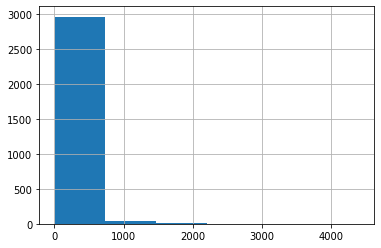

In [282]:
# Memvisualisasikan variabel Price
df_final["price"].hist(bins=6)

In [283]:
# Berdasarkan rumus yang telah diketahui, kita dapat menstandardisasi variabel price
df_final['price_stand'] = (df_final["price"] - df_final["price"].mean()) / (df_final["price"].std())

In [284]:
df_final['price_stand'].describe()

count    3.006000e+03
mean    -7.756049e-17
std      1.000000e+00
min     -6.191740e-01
25%     -4.242207e-01
50%     -2.346828e-01
75%      6.364984e-02
max      2.318663e+01
Name: price_stand, dtype: float64

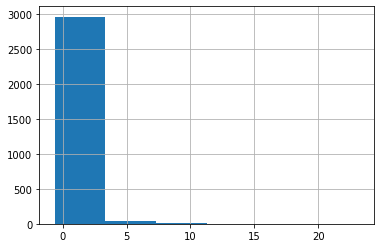

In [285]:
df_final['price_stand'].hist(bins = 6)

In [286]:
df_final.to_csv(path + 'df_terbaru.csv')

## EXPLORATORY DATA

In [287]:
df_final.head()

,index,order_id,product_id,customer_id,order_status,order_purchase_timestamp,price,payment_type,product_category_name,product_weight_g,customer_id,customer_city,seller_id,seller_city,seller_state,seller_zip_code_prefix,geolocation_lat,geolocation_lng,price_stand
0,1,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,74.00,credit_card,bed_bath_table,1383.0,f5afca14dfa9dc64251cf2b45c54c363,duque de caxias,001cca7ae9ae17fb1caed9dfb1094831,cariacica,ES,29156,-19.912800,-43.903035,-0.239557
1,2,00119ff934e539cf26f92b9ef0cdfed8,21b1c2f67a9aafb5af0eb06c13b9dbda,7dd2e283f47deac853cf70f3b63c8d86,delivered,2017-08-06 00:42:49,219.90,credit_card,sports_leisure,9800.0,be8c14c16a4d47194ccdfe10f1fc5b1a,cosmopolis,001e6ad469a905060d959994f1b41e4f,sao goncalo,RJ,24754,-22.758135,-43.438347,0.550546
2,3,0015ebb40fb17286bea51d4607c4733c,50fd2b788dc166edd20512370dac54df,da43a556bf5c36a1104c473cff77de6c,delivered,2018-01-14 09:01:36,21.90,credit_card,electronics,150.0,388025bec8128ff20ec1a316ed4dcf02,cascavel,002100f778ceb8431b7a1020ff7ab48f,franca,SP,14405,-23.492842,-47.470719,-0.521697
3,4,0016dfedd97fc2950e388d2971d718c7,4089861a1bd4685da70bddd6b4f974f1,2c8b917c5d7dd720ebe36a5ed3b501ec,delivered,2017-04-28 19:54:40,49.75,credit_card,garden_tools,1500.0,05e996469a2bf9559c7122b87e156724,portao,003554e2dce176b5555353e4f3555ac8,goiania,GO,74565,-14.315260,-49.150986,-0.370879
4,5,001b76dd48a5b1eee3e87778daa40df8,dbb67791e405873b259e4656bf971246,a62843b08086d1629415a203a7fd419d,delivered,2018-03-26 17:42:53,81.99,credit_card,computers_accessories,207.0,5bb39c890c91b1d26801aa19a9336eac,sao paulo,004c9cd9d87a3c30c522c48c4fc07416,ibitinga,SP,14940,-23.988847,-48.872939,-0.196288


1. Bagaimana persebaran jenis pembayaran.

In [288]:
#Another Insight (jenis pembayaran yang banyak dilakukan pada  saat order)
df_pembayaran = df_final.groupby('payment_type')['order_id'].count().reset_index()
df_pembayaran

,payment_type,order_id
0,boleto,563
1,credit_card,2241
2,debit_card,45
3,voucher,157


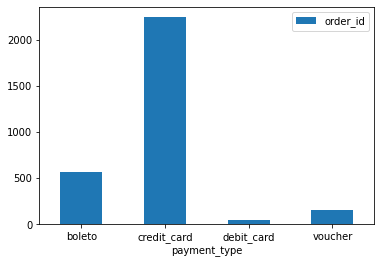

In [289]:
payment = df_pembayaran.plot.bar(x='payment_type', y='order_id', rot=0)

2. Bagaimana persebaran wilayah customer?

In [290]:
#Another insight (wilayah asal customer)
df_wilayah = df_final['customer_city'].value_counts()
df_wilayah

sao paulo         475
rio de janeiro    232
belo horizonte     74
brasilia           67
porto alegre       50
                 ... 
casa branca         1
mossoro             1
urubici             1
andradas            1
moju                1
Name: customer_city, Length: 798, dtype: int64

In [295]:
# Memfilter 3 data pertama Kateogry produk dan jumlah order
df_top_wilayah = df_wilayah.iloc[0:3]
df_top_wilayah

sao paulo         475
rio de janeiro    232
belo horizonte     74
Name: customer_city, dtype: int64

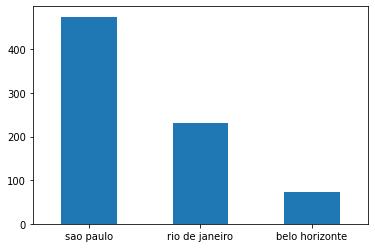

In [296]:
wilayah = df_top_wilayah.plot.bar(x='customer_city', y='order_id', rot=0)

3. Berapa jumlah customer setiap kategori produk? 

In [292]:
#Another Insight (jenis produk yang banyak dicari)
df_jenis_produk = df_final['product_category_name'].value_counts()
df_jenis_produk

bed_bath_table           314
health_beauty            278
furniture_decor          226
sports_leisure           222
housewares               178
                        ... 
home_comfort_2             1
arts_and_craftmanship      1
food_drink                 1
cine_photo                 1
diapers_and_hygiene        1
Name: product_category_name, Length: 64, dtype: int64

In [293]:
# Memfilter 3 data pertama Kateogry produk dan jumlah order
df_top_jenis = df_jenis_produk.iloc[0:3]
df_top_jenis

bed_bath_table     314
health_beauty      278
furniture_decor    226
Name: product_category_name, dtype: int64

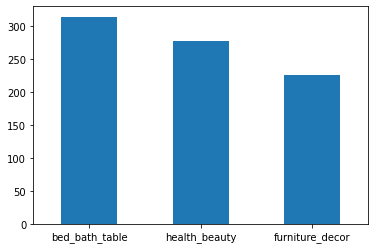

In [294]:
produk = df_top_jenis.plot.bar(x='product_category_name', y='order_id', rot=0)

## REKOMENDASI

## KESIMPULAN - Create the story

Data Case Study 2 mengenai Olist Store yaitu salah satu e-Commerce terbesar di Brazil.
Proses pengerjaan yang saya lakukan adalah pertama saya mengconnectkan google colab ke google drive untuk nantinya membaca dataset. Setelah bisa membaca data, saya memfilter kolom yang akan saya pakai tiap tabelnya.
Selanjutnya, saya melakukan proses cleansing yang mana saya mengecek missing values, duplicate, dan tipe data.
Setelah data saya bersih, saya melakukan proses EDA untuk dapat menjawab Problem Statement yang saya inginkan.


1. Bagaimana persebaran jenis pembayaran yang dilakukan oleh customer? (order-payment type, customer-customer_id)

  Persebaran jenis pembayaran yang banyak dilakukan diurutkan yang paling banyak hingga yang sedikit adalah credit card, boleto, voucher, dan debit card.

2. Bagaimana persebaran asal wilayah customer?

  3 besar wilayah asal dari customer antara lain sao paulo, rio de janeiro, dan beto horizonte.

3. Produk apa yang banyak dicari oleh customer? (product- product_category_name, customer-customer_id) 

  Jenis produk yang paling banyak dicari oleh customer adalah  bed_bath_table, health_beauty, dan furniture_decor. Hal ini dibuktikan dengan jenis produk ini yang sering muncul dalam data yang ada.

